 <div>
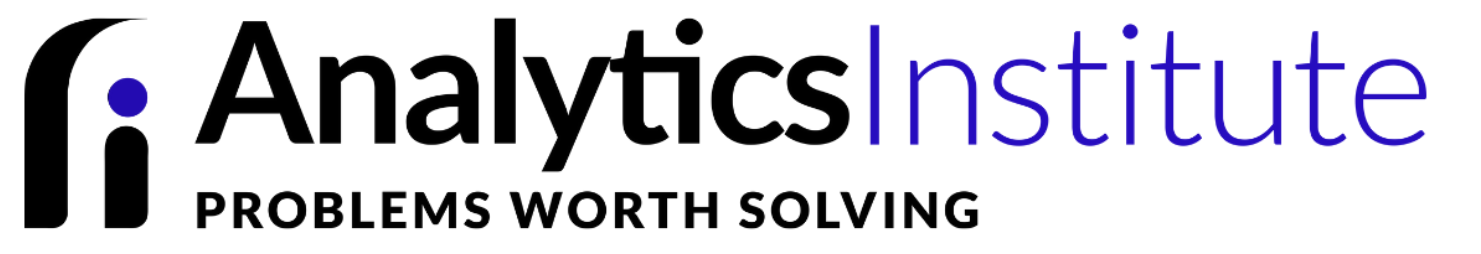
    
</div>

 <div>
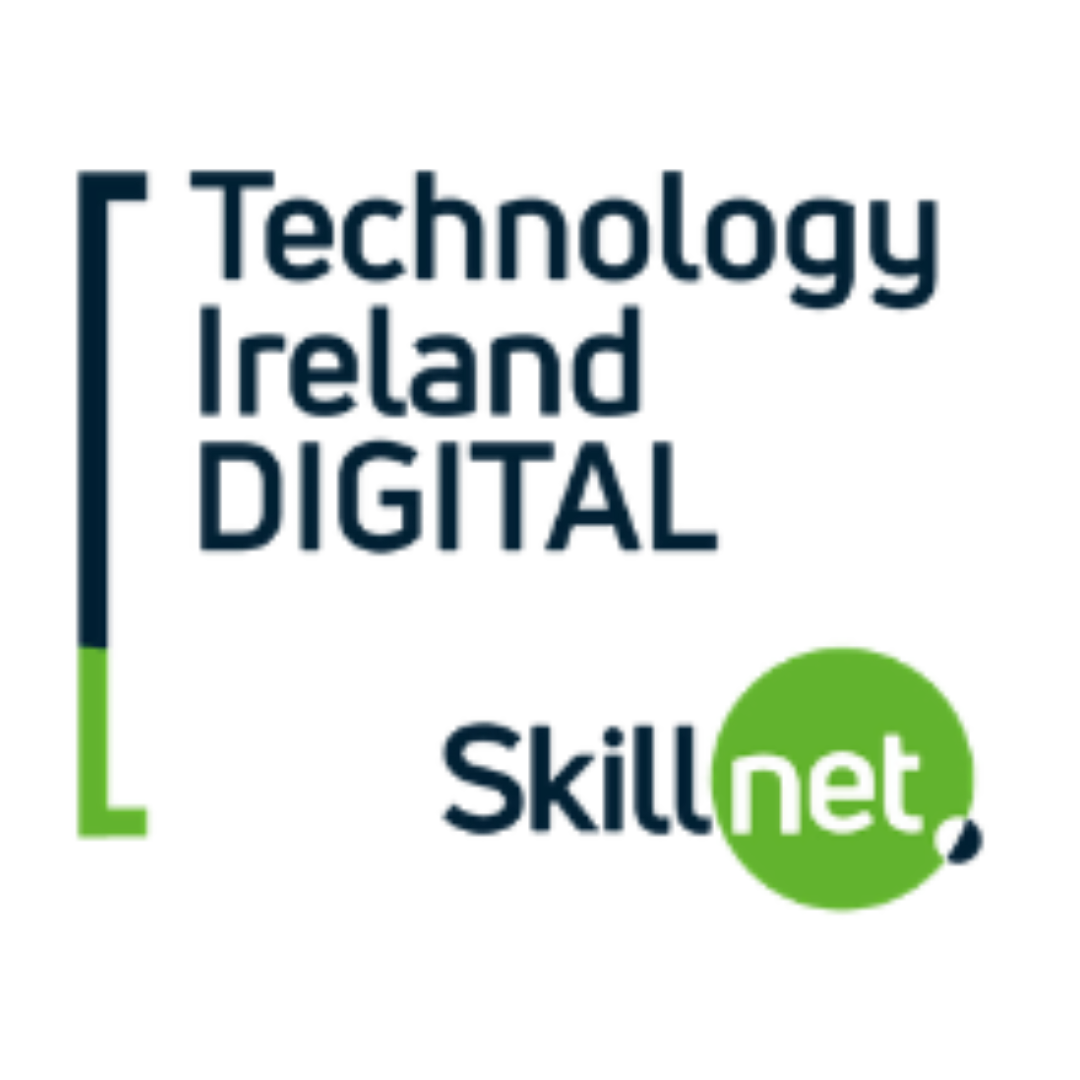
    
</div>

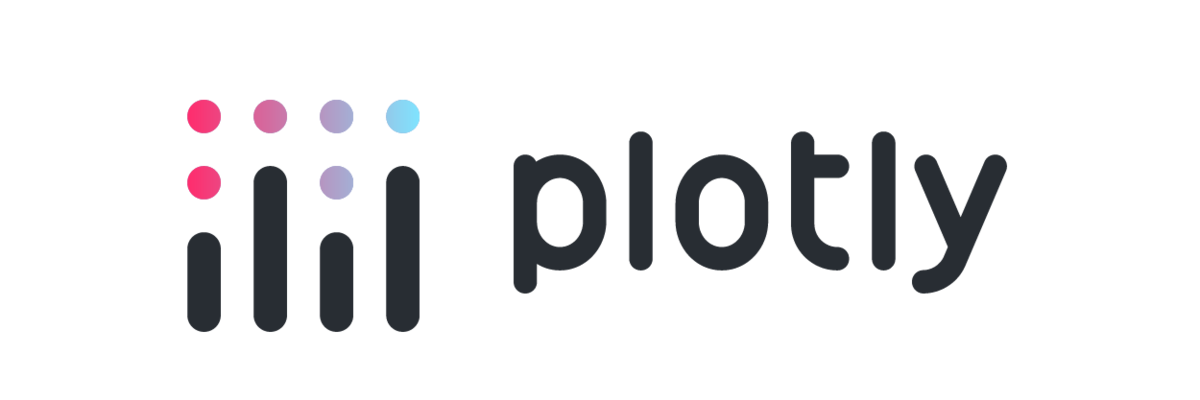


# Interactive Data Visualisation with Plotly and Dash


### Content:



### Introduction
- What is Plotly?
- Why use Plotly?
- Environment setup for Plotly and Dash
- Plotly fundamentals
    - Graph Objects
    - Plotly Express
    - Customizing visuals  
- What is Dash?
- Why use Dash?




### Plotly
- Getting started with Plotly
    - Line chart
    - Bar chart
    - 3D scatter
- Plotly gallery: https://plotly.com/python/


### Dash
- This part will be demonstrated in VSCode 
- Getting started with Dash
- Dash fundamentals
    - Layout
    - Components
    - Callbacks
- Dash gallery: https://dash.gallery/Portal/


#### Before starting, adjust the view window for visuals
This code accesses the HTML associated with the styling of the Jupyter Notebook and makes the view window larger for the Plotly visualisations.

Note: this code works for Jupyter Notebook but not Jupyter Lab.

In [1]:
from IPython.display import display, HTML
window_height = 600 #change this variable to choose height in pixels
display(HTML("<style>div.output_scroll { height:" + str(window_height) +  "px; }</style>"))


# What is Plotly?

- Plotly is an open-source Python library for creating interactive and visually appealing data visualizations.
- It supports a wide range of plot types and provides extensive customization options for colors, markers, labels, and more.


### Key import statements

In [2]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go


### Plotly Animated Graph Example: Life Expectancy vs. GDP PC
This animation demonstrates some features of Plotly:
- Complatability with Pandas
- Interactive and customisable tooltip/ data labels
- Interactive slider
- Toggle filter legend

In [25]:
df = px.data.gapminder() # grab data from the plotly API in the form of a Pandas DF
# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})


# Create an animated scatter plot using Plotly Express
fig = px.scatter(
    df, x="GDP Per Capita", y="Life Expectancy",  # Set x and y variables
    animation_frame="Year",  # Specify the column for animation
    animation_group="Country",  # Specify the column for grouping points within each frame
    size="Population",  # Set the size of markers based on the 'pop' column
    color="Continent",  # Set the color of markers based on the 'continent' column
    hover_name="Country",  # Set the labels for hover information
    log_x=True,  # Set logarithmic scale for the x-axis
    size_max=55,  # Set the maximum size of markers
    range_x=[100, 100000],  # Set the range of the x-axis
    range_y=[25, 90],  # Set the range of the y-axis
    hover_data={
                'GDP Per Capita': ':.2f',
                'Life Expectancy': ':d'
                            }
)

fig.update_layout(
    xaxis_title="GDP Per Capita",  # Set x-axis label,
    yaxis_title="Life Expectancy",  # Set y-axis label
    plot_bgcolor="white", # Set background color of plot
    paper_bgcolor="white" # Set overall background color including margins
)


### Pull in data using Plotly Express API. 
- Data could also be pulled in from other sources including CSV file, Excel file, SQL database. 
- Data is loaded into a Pandas DataFrame.

In [4]:
df = px.data.gapminder() 
# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})
df

,Country,Continent,Year,Life Expectancy,Population,GDP Per Capita,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


### Build scatter animation
We can think Plotly animations as dynamic filtering operations. In the code below, by setting animation_frame to "Year", we are telling Plotly to display one year of data for each animation frame.

In [5]:


# Create an animated scatter plot using Plotly Express
fig = px.scatter(
    df, x="GDP Per Capita", y="Life Expectancy",  # Set x and y variables
    animation_frame="Year",  # Specify the column for animation
    animation_group="Country",  # Specify the column for grouping points within each frame
    size="Population",  # Set the size of markers based on the 'pop' column
    color="Continent",  # Set the color of markers based on the 'continent' column
    hover_name="Country",  # Set the labels for hover information
    log_x=True,  # Set logarithmic scale for the x-axis
    size_max=55,  # Set the maximum size of markers
    range_x=[100, 100000],  # Set the range of the x-axis
    range_y=[25, 90],  # Set the range of the y-axis
    hover_data={
                'GDP Per Capita': ':.2f',
                'Life Expectancy': ':d'
                            }
)

fig.update_layout(
    xaxis_title="GDP Per Capita",  # Set x-axis label,
    yaxis_title="Life Expectancy",  # Set y-axis label
    plot_bgcolor="white",
    paper_bgcolor="white"
)

# Why Use Plotly?

### What does Plotly offer over Seaborn or Matplotlib?

- Compared with  Python's other data visualisation libraries, e.g. Seaborn and Matplotlib, Plotly makes it easier to add interactive features, such as zooming/panning, filtering and hover tooltips, allowing users to explore data dynamically.

### What does Plotly offer over Tableau or PowerBI?

- When using Tableau or PowerBI, you are limited to use the features which the software supports. By using code instead, you have more control over your visualisations, their interactive components, and where they are hosted.
- Plotly integrates well with programming languages like Python, R, and JavaScript, and with popular data science ecosystems like Jupyter.
    - Plotly can interface directly with machine learning models in Python
    - Because Plotly uses JavaScript, this supports integrating visualisations within the front end of a fullstack data application. We will see later how to build data-driven web applications using Dash Plotly.
- Open-source nature, fostering a supportive community.
Facilitates collaboration and sharing of visualization code.

---

## What is Dash ?

So far, we have run Plotly code such that data vis widgets appear with the Jupyter Notebook.
If we want to create a web application with Plotly, we use Dash. Dash is a powerful framework built on top of Plotly that allows you to build interactive web applications.

Dash extends the capabilities of Plotly by providing additional features:

**Components:** Dash allows you to create interactive components such as sliders, dropdowns, input boxes, and buttons, enabling users to interact with your data application.


**Layout:** With Dash, you have full control over the layout of your application. You can arrange components using a flexible grid system, customize the appearance with CSS, and create multi-page applications.

**Callbacks:** Dash uses callbacks to update the content and behavior of your application based on user input or other events. You can define callbacks to update plots, tables, or any other component in response to user interactions.


### Education choropleth animation with Dash

I would recommend VSCode for developing apps with Plotly Dash, especially for larger codebases. The Jupyter Dash library, however, makes it possible to run Dash apps embedded within the Juptyer environment, which may suit your workflow if you use Jupyter Notebooks commonly for sharing data work.

**About the dataset**
http://www.barrolee.com/
https://github.com/barrolee/BarroLeeDataSet

The BarroLee dataset provides educational attainment data for 146 countries in 5-year intervals from 1950 to 2010. It provides information about the distribution of educational attainment of the adult population over age 15. The version of the dataset used for the Dash App has been cleanded and reshaped.

### View dataset as DataFrame

In [6]:
import pandas as pd
url = 'https://raw.githubusercontent.com/TamsinHuggins/dash-education-vis/main/with_iso_alpha_education.csv'
df=pd.read_csv(url)
df

,Unnamed: 0,country,year,no_schooling,total_primary,completed_primary,total_secondary,completed_secondary,total_tertiary,completed_tertiary,avg_years_total_schooling,avg_years_primary_schooling,avg_years_secondary_schooling,avg_years_tertiary_schooling,population_1000s,region,iso_alpha
0,0,Australia,1870,50.5,49.3,8.8,0.1,0.0,0.1,0.0,1.77,1.76,0.01,0.00,932.0,Advanced Economies,AUS
1,1,Australia,1875,46.0,53.8,9.6,0.1,0.0,0.1,0.0,1.93,1.92,0.01,0.00,1074.0,Advanced Economies,AUS
2,2,Australia,1880,41.5,58.0,9.7,0.3,0.1,0.2,0.1,2.08,2.06,0.02,0.00,1314.0,Advanced Economies,AUS
3,3,Australia,1885,36.1,61.7,11.3,2.0,0.4,0.2,0.1,2.41,2.32,0.08,0.01,1569.0,Advanced Economies,AUS
4,4,Australia,1890,29.7,66.6,13.3,3.5,0.7,0.3,0.1,2.76,2.62,0.13,0.01,1895.0,Advanced Economies,AUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2576,2928,Zimbabwe,1990,12.2,47.9,21.8,36.1,21.8,3.8,2.3,5.97,3.74,2.11,0.12,5399.0,Sub-Saharan Africa,ZWE
2577,2929,Zimbabwe,1995,8.8,41.8,21.5,46.8,18.9,2.6,1.5,6.85,4.46,2.31,0.08,6172.0,Sub-Saharan Africa,ZWE
2578,2930,Zimbabwe,2000,6.6,36.3,19.9,56.0,7.3,1.0,0.7,7.26,5.05,2.18,0.03,6813.0,Sub-Saharan Africa,ZWE
2579,2931,Zimbabwe,2005,5.4,36.3,22.3,57.4,6.7,0.9,0.6,7.65,5.50,2.13,0.03,7336.0,Sub-Saharan Africa,ZWE


### Notebook-embedded Dash app
uncomment code to run.

In [7]:
# # make the view window larger
# from IPython.display import display, HTML
# window_height = 1000 #change this variable to choose height in pixels
# display(HTML("<style>div.output_scroll { height:" + str(window_height) +  "px; }</style>"))

# #importing modules
# import pandas as pd
# import plotly.express as px
# import plotly.graph_objects as go
# from jupyter_dash import JupyterDash
# from dash import Dash, dcc, html, Input, Output  

# app = JupyterDash(__name__) # JupyterDash instead of Dash here when working within Jupyter

# server = app.server

# url = 'https://raw.githubusercontent.com/TamsinHuggins/dash-education-vis/main/with_iso_alpha_education.csv'

# # App layout
# df=pd.read_csv(url)

# app.layout = html.Div([

#     html.H1("How Has Global Education Changed Since 1870?", style={'text-align': 'center'}),

#     dcc.Dropdown(id="slct_view",
#                  options=[
#                      {"label": "Completed Primary Education", "value": "completed_primary"},
#                      {"label": "Completed Secondary Education", "value": "completed_secondary"},
#                      {"label": "Completed Teritary Education", "value":"completed_tertiary"},
#                      {"label": "Average Years Total Schooling", "value": "avg_years_total_schooling" }],
#                  multi=False,
#                  value="avg_years_total_schooling",
#                  style={'width': "40%"}
#                  ),

#     html.Div(id='output_container', children=[]),
#     html.Br(),

#     dcc.Graph(id='education_map', figure={})

# ])

# # ------------------------------------------------------------------------------
# # Connect components (input) to visuals (output)
# @app.callback(
#     [Output(component_id='output_container', component_property='children'),
#      Output(component_id='education_map', component_property='figure')],
#     [Input(component_id='slct_view', component_property='value')] # must be value not label
# )
# def update_graph(option_slctd):
#     # retrieves information from Input to select data from df


#     app.logger.info(option_slctd)
#     print(option_slctd)
#     print(type(option_slctd))

#     container = "You are viewing: {}".format(option_slctd)

#     # dff = df.copy()
#     # dff = dff[['year', option_slctd]]
#     # print(dff.head())

#     # // Plotly Express
#     fig = px.choropleth(
#                         data_frame=df,
#                         animation_frame='year',
#                         color=option_slctd, 
#                         locations="iso_alpha",
#                         color_continuous_scale=px.colors.diverging.Geyser_r,
#                         hover_data= ['country'],
#                         range_color=[0, df[option_slctd].max()] # calibrate the scale to the right range
#                         )

#     return container, fig


# # ------------------------------------------------------------------------------
# if __name__ == '__main__':
#     app.run_server(mode='inline') # mode decides where visual is displayed. mode= outside, mode=jupyterlab

----

# Environment Setup for Plotly and Dash

These setup instructions assume that you have Python installed.

If you want to use conda to install packages, you should have anaconda installed: https://www.anaconda.com/download

### Prerequisites

#### Install Pandas
Pandas is a recommended for Plotly

``` conda install -c anaconda pandas ```

OR


``` pip install pandas ```

---

### Plotly Setup
Installing Plotly requires running these commands in your computer's terminal.
You may want to install plotly within a specific conda environment; this is not covered in this tutorial but more information on conda environments can be found here: https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html

#### Install Plotly


``` conda install -c plotly plotly ```

OR

``` pip install plotly```

#### Install Jupyter Notebook support for Plotly

``` conda install "notebook>=5.3" "ipywidgets>=7.5" ```

OR

``` pip install "notebook>=5.3" "ipywidgets>=7.5"```

----

### Dash Setup
*Installing Dash also installs Plotly if it hasn't already been installed.

Pandas installation is also recommended for using Dash

#### Install Dash

``` conda install -c conda-forge dash ```

OR 

``` pip install dash```

#### Install Jupyter Dash
If you want to run Plotly Dash within/ from Jupyter Notebook, run the following in your terminal:

```conda install -c conda-forge jupyter-dash ```

OR

``` pip install jupyter-dash ```

----


Check versions:

In [8]:
print(pd.__version__)

1.4.2


In [9]:
import plotly
print(plotly.__version__)

5.6.0


In [10]:
import dash
print(dash.__version__)

2.7.0


# Plotly Fundamentals

- Plotly Graph Objects (go)
- Plotly Express (px)
- Example charts
    - Line chart
    - Bar chart
    - 3D scatter
- Styling and custiomizing charts

### When to use Graph Objects (go) versus Express (px)
https://plotly.com/python/graph-objects/

#### Reasons to use px
- Plotly Express returns instances of graph objects.
- Plotly Express can build the same figure from the same data as graph objects but with fewer lines of code.
- Using Plotly Express you can build with one line what would require 5 - 100 lines using Graph objects.
- Plotly Express figures are easy to customize at creation-time using function parameters and manipulate after using update_* and add_* methods.

#### Reasons to use go
- Certain figures, such as figures that use certain 3D trace-types like mesh or isosurface, are not yet supported by Plotly Express.
- For certain complex figures, such as dual axes plots, it is easier to start with a plotly.graph_objects.Figure and progressively add more traces.


### Key import statements

In [11]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

## Line charts

https://plotly.com/python/line-charts/

#### Pull in data using Plotly Express API. 
- Data could equally be pulled in from other sources including CSV files, Excel files, SQL databases. 
- Data is loaded into a Pandas DataFrame.

In [12]:
df = px.data.gapminder() 
# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})
df

,Country,Continent,Year,Life Expectancy,Population,GDP Per Capita,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


### Line chart using Plotly Graph Objects (go)

In [13]:
#filter DataFrame for just Ireland
ireland_df = df[df.Country == 'Ireland']

# Create a figure and add a line trace
fig = go.Figure()
fig.add_trace(go.Scatter(y=ireland_df['GDP Per Capita'], x=ireland_df['Year'], mode='lines'))

# Display the plot
fig.show()

 ### Line chart using Plotly Graph Objects (go) with title and labelled axes

In [14]:
# Create a figure and add a line trace
fig = go.Figure()
fig.add_trace(go.Scatter(y=ireland_df['GDP Per Capita'], x=ireland_df['Year'], mode='lines'))

# Set layout options
fig.update_layout(
    title='GDP Per Capita of Ireland Over Time',
    xaxis_title='Year',
    yaxis_title='GDP Per Capita'
)

# Display the plot
fig.show()

### Line chart using Plotly Graph Objects (go), mulitple lines: 

In [15]:
df.Country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium',
       'Benin', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Haiti',
       'Honduras', 'Hong Kong, China', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy',
       'Jamaica', 'Japan', 'Jordan', 'Kenya', 'Korea, Dem. Rep.',
       'Korea, Rep.', 'Kuwait', 'Leba

In [16]:
# Create figure
fig = go.Figure()

#add line trace
fig.add_trace(go.Scatter(y=df[(df.Country == 'Ireland')]['GDP Per Capita'],
                         x=df[(df.Country == 'Ireland')]['Year'], mode='lines', name='Ireland', 
                         hovertemplate="Country=Ireland<br>Year=%{x}<br>GDP Per Capita=%{y}<extra></extra>"))

# add secondary line trace
fig.add_trace(go.Scatter(y=df[(df.Country == 'United Kingdom')]['GDP Per Capita'],
                         x=df[(df.Country == 'United Kingdom')]['Year'], mode='lines', 
                         name='United Kingdom', 
                         hovertemplate="Country=United Kingdom<br>Year=%{x}<br>GDP Per Capita=%{y}<extra></extra>"))

# Set layout options
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP Per Capita'
)

# Display the plot
fig.show()

### Line chart using Plotly Express (px), mulitple lines: 

In [17]:
# Create line chart using Plotly Express
fig = px.line(df[(df['Country'] == 'Ireland') | (df['Country'] =='United Kingdom')],
              x='Year', y='GDP Per Capita', 
              color='Country')

# Set layout options
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='GDP Per Capita'
)

# Display the plot
fig.show()


## Bar Charts
https://plotly.com/python/bar-charts/

#### Pull in data using Plotly Express API. 
- Data could equally be pulled in from other sources including CSV files, Excel files, SQL databases. 
- Data is loaded into a Pandas DataFrame.

In [18]:
df = px.data.gapminder() 
# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})
df

# perfrom aggregation on the data
continent_summed = df[df['Year'] == 2007][['Continent', 'Population']].groupby('Continent').sum()
continent_summed.reset_index(inplace=True)
continent_summed


,Continent,Population
0,Africa,929539692
1,Americas,898871184
2,Asia,3811953827
3,Europe,586098529
4,Oceania,24549947


In [19]:

# create the chart uaing Plotly Express
fig = px.bar(continent_summed, x='Continent', y='Population')

# Show the chart
fig.show()

### Bar chart with styling

In [20]:
# Create bar chart using Plotly Express
fig = px.bar(continent_summed, x='Continent', y='Population', color="Population", color_continuous_scale="Darkmint")

# Update the layout options for the figure
fig.update_layout(
    xaxis={'categoryorder': 'total descending'},# Order the bars
    coloraxis_showscale=False, # Hide the color scale legend (color axis)
    plot_bgcolor="white",# Set the background color 
    paper_bgcolor="white",# Set the background color of the entire figure (including margins)
    title='Total Continent Populations in 2007' # Set the title of the plot
)

# Display the plot
fig.show()


### Bar chart with labelled bars

Select data

In [21]:
df = px.data.gapminder() 
# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})

#filter the data for Europe continent, year 2007
df_europe = df[(df['Continent'] == 'Europe') & (df['Year'] == 2007)]
df_europe.head()

,Country,Continent,Year,Life Expectancy,Population,GDP Per Capita,iso_alpha,iso_num
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
83,Austria,Europe,2007,79.829,8199783,36126.492700,AUT,40
119,Belgium,Europe,2007,79.441,10392226,33692.605080,BEL,56
155,Bosnia and Herzegovina,Europe,2007,74.852,4552198,7446.298803,BIH,70
191,Bulgaria,Europe,2007,73.005,7322858,10680.792820,BGR,100


Create chart

In [22]:
# Create a bar chart using Plotly Express, using the 'Population' column as the y-values and the 'Country' column as the x-values
fig = px.bar(df_europe, y='Population', x='Country', text_auto='.2s', title="Controlled text sizes, positions and angles")

# Update the properties of the bar chart traces
fig.update_traces(textfont_size=12, # Set font size
                  textangle=0, # Set angle of the bar labels to 0 degrees (horizontal)
                  textposition="outside", # Set the position of the text labels to be placed outside the bars
                  cliponaxis=False # allow the text labels to appear even if they exceed the axis limits
                 )

# Update the layout options for the figure
fig.update_layout(uniformtext_minsize=8,
                  uniformtext_mode='hide' # hide text labels that would overlap with neighboring labels
                 )
# Display the plot
fig.show()

## 3D scatter plot
https://plotly.com/python/3d-scatter-plots/

In [23]:
import plotly.express as px

#pull in data from Plotly
iris_df = px.data.iris()

#build scatter using Plotly Express
fig = px.scatter_3d(iris_df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')

#update visual: set size and opacity of markers
fig.update_traces(marker=dict(size=5, opacity=0.6))

#show visual
fig.show()


### Example dark theme px visual

In [24]:
import plotly.express as px
df = px.data.gapminder() # grab data from the plotly API in the form of a Pandas DF

# renaming some of the DataFrame columns for vis readability
df = df.rename(columns={"country":"Country", 
                        "continent":"Continent", 
                        "year": "Year", 
                        "lifeExp" : "Life Expectancy",
                        "pop": "Population",
                        "gdpPercap" : "GDP Per Capita"})


# Create an animated scatter plot using Plotly Express
fig = px.scatter(
    df, x="GDP Per Capita", y="Life Expectancy",  # Set x and y variables
    animation_frame="Year",  # Specify the column for animation
    animation_group="Country",  # Specify the column for grouping points within each frame
    size="Population",  # Set the size of markers based on the 'pop' column
    color="Continent",  # Set the color of markers based on the 'continent' column
    hover_name="Country",  # Set the labels for hover information
    log_x=True,  # Set logarithmic scale for the x-axis
    size_max=55,  # Set the maximum size of markers
    range_x=[100, 100000],  # Set the range of the x-axis
    range_y=[25, 90],  # Set the range of the y-axis
    hover_data={
                'GDP Per Capita': ':.2f',
                'Life Expectancy': ':d'
                            }
)

#update visual
fig.update_layout(
    xaxis_title="GDP Per Capita", # label x axis
    yaxis_title="Life Expectancy", # label y axis
    plot_bgcolor=" black", # dark theme
    paper_bgcolor="black", # dark theme
    xaxis=dict(showgrid=False), # remove x gridlines
    yaxis=dict(showgrid=False), # remove y gridlines
    font=dict(color="#ADD8E6") # set font color
)

#update the size and color of the marker outlines
fig.update_traces(marker=dict( line=dict(width=0.5,
                                        color='#ADD8E6')),
                  selector=dict(mode='markers'))

# Dash
Dash tutorial will be demonstrated in VSCode. Full code for the demo app is included in this notebook under 'Notebook-embedded dash app'

Dash extends the capabilities of Plotly by providing additional features:

**Components:** Dash allows you to create interactive components such as sliders, dropdowns, input boxes, and buttons, enabling users to interact with your data application.


**Layout:** With Dash, you have full control over the layout of your application. You can arrange components using a flexible grid system, customize the appearance with CSS, and create multi-page applications.

**Callbacks:** Dash uses callbacks to update the content and behavior of your application based on user input or other events. You can define callbacks to update plots, tables, or any other component in response to user interactions.
